# BigData-Session-2 Solution: Pandas Intro and Data Wrangling

This notebook provides complete solutions for the BigData-session-2 exercises.
It demonstrates data wrangling and manipulation techniques.

## 1. Setup and Library Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Pandas version: 2.3.3
NumPy version: 2.4.0


## 2. Data Wrangling Fundamentals

In [3]:
# SOLUTION: Create sample dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 28, 32],
    'Salary': [50000, 60000, 75000, 55000, 65000],
    'Department': ['IT', 'HR', 'IT', 'Finance', 'HR']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
      Name  Age  Salary Department
0    Alice   25   50000         IT
1      Bob   30   60000         HR
2  Charlie   35   75000         IT
3    David   28   55000    Finance
4      Eve   32   65000         HR


In [4]:
# SOLUTION: Filtering and selection
print("\n=== FILTERING ===")
print("\nEmployees with Age > 28:")
print(df[df['Age'] > 28])

print("\nEmployees in IT Department:")
print(df[df['Department'] == 'IT'])

print("\nMultiple conditions (Age > 28 AND Salary > 60000):")
print(df[(df['Age'] > 28) & (df['Salary'] > 60000)])


=== FILTERING ===

Employees with Age > 28:
      Name  Age  Salary Department
1      Bob   30   60000         HR
2  Charlie   35   75000         IT
4      Eve   32   65000         HR

Employees in IT Department:
      Name  Age  Salary Department
0    Alice   25   50000         IT
2  Charlie   35   75000         IT

Multiple conditions (Age > 28 AND Salary > 60000):
      Name  Age  Salary Department
2  Charlie   35   75000         IT
4      Eve   32   65000         HR


In [5]:
# SOLUTION: Sorting
print("\n=== SORTING ===")
print("\nSort by Age (ascending):")
print(df.sort_values('Age'))

print("\nSort by Salary (descending):")
print(df.sort_values('Salary', ascending=False))


=== SORTING ===

Sort by Age (ascending):
      Name  Age  Salary Department
0    Alice   25   50000         IT
3    David   28   55000    Finance
1      Bob   30   60000         HR
4      Eve   32   65000         HR
2  Charlie   35   75000         IT

Sort by Salary (descending):
      Name  Age  Salary Department
2  Charlie   35   75000         IT
4      Eve   32   65000         HR
1      Bob   30   60000         HR
3    David   28   55000    Finance
0    Alice   25   50000         IT


In [6]:
# SOLUTION: Grouping and aggregation
print("\n=== GROUPING AND AGGREGATION ===")
print("\nAverage salary by department:")
print(df.groupby('Department')['Salary'].mean())

print("\nCount by department:")
print(df.groupby('Department').size())

print("\nMultiple aggregations:")
print(df.groupby('Department').agg({
    'Age': 'mean',
    'Salary': ['mean', 'min', 'max']
}))


=== GROUPING AND AGGREGATION ===

Average salary by department:
Department
Finance    55000.0
HR         62500.0
IT         62500.0
Name: Salary, dtype: float64

Count by department:
Department
Finance    1
HR         2
IT         2
dtype: int64

Multiple aggregations:
             Age   Salary              
            mean     mean    min    max
Department                             
Finance     28.0  55000.0  55000  55000
HR          31.0  62500.0  60000  65000
IT          30.0  62500.0  50000  75000


## 3. Working with Real Data

In [15]:
# SOLUTION: Load Sherlock dataset
try:
    df_sherlock = pd.read_csv('../sherlock/sherlock_mystery_2apps.csv')
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df_sherlock.shape}")
    print(f"\nFirst few rows:")
    print(df_sherlock.head())
except FileNotFoundError:
    print("Dataset not found. Creating sample data...")
    df_sherlock = pd.DataFrame()

Dataset loaded successfully!
Shape: (788587, 14)

First few rows:
   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0           0        Facebook       0.20     0.0    0           77   
1           1        WhatsApp       0.12     1.0    0           47   
2           2        Facebook       0.20     0.0    0           77   
3           3        WhatsApp       0.12     1.0    0           47   
4           4        Facebook       0.20     0.0    0           77   

   otherPrivateDirty  priority  utime       vsize  cminflt  guest_time  \
0               5776        20  464.0  2204618752      NaN   17.854415   
1               2852        20  274.0  1992155136      NaN   11.269066   
2               5776        20  464.0  2204618752      NaN   17.854415   
3               2852        20  274.0  1992155136      NaN   11.269066   
4               5764        20  464.0  2204618752      NaN   21.904244   

          Mem  queue  
0  2204618752  100.0  
1  1992155136  100.0  

In [16]:
# SOLUTION: Data exploration
if not df_sherlock.empty:
    print("\n=== DATA EXPLORATION ===")
    print(f"\nShape: {df_sherlock.shape}")
    print(f"\nColumn names: {df_sherlock.columns.tolist()}")
    print(f"\nData types:")
    print(df_sherlock.dtypes)
    print(f"\nMissing values:")
    print(df_sherlock.isnull().sum())
    print(f"\nBasic statistics:")
    print(df_sherlock.describe())


=== DATA EXPLORATION ===

Shape: (788587, 14)

Column names: ['Unnamed: 0', 'ApplicationName', 'CPU_USAGE', 'cutime', 'lru', 'num_threads', 'otherPrivateDirty', 'priority', 'utime', 'vsize', 'cminflt', 'guest_time', 'Mem', 'queue']

Data types:
Unnamed: 0             int64
ApplicationName       object
CPU_USAGE            float64
cutime               float64
lru                    int64
num_threads            int64
otherPrivateDirty      int64
priority               int64
utime                float64
vsize                  int64
cminflt              float64
guest_time           float64
Mem                    int64
queue                float64
dtype: object

Missing values:
Unnamed: 0                0
ApplicationName           0
CPU_USAGE                 0
cutime                    0
lru                       0
num_threads               0
otherPrivateDirty         0
priority                  0
utime                     0
vsize                     0
cminflt              176473
guest_tim

In [17]:
# SOLUTION: Data cleaning
if not df_sherlock.empty:
    print("\n=== DATA CLEANING ===")
    
    # Remove duplicates
    print(f"\nOriginal shape: {df_sherlock.shape}")
    df_clean = df_sherlock.drop_duplicates()
    print(f"After removing duplicates: {df_clean.shape}")
    
    # Handle missing values
    print(f"\nMissing values before: {df_clean.isnull().sum().sum()}")
    df_clean = df_clean.dropna()
    print(f"Missing values after: {df_clean.isnull().sum().sum()}")
    print(f"Final shape: {df_clean.shape}")


=== DATA CLEANING ===

Original shape: (788587, 14)
After removing duplicates: (788587, 14)

Missing values before: 176473
Missing values after: 0
Final shape: (612114, 14)


## 4. Data Transformation

In [18]:
# SOLUTION: Create new columns
df_transform = df.copy()

# Add new column
df_transform['Bonus'] = df_transform['Salary'] * 0.1
df_transform['Age_Group'] = pd.cut(df_transform['Age'], bins=[0, 30, 40], labels=['Young', 'Senior'])

print("DataFrame with new columns:")
print(df_transform)

DataFrame with new columns:
      Name  Age  Salary Department   Bonus Age_Group
0    Alice   25   50000         IT  5000.0     Young
1      Bob   30   60000         HR  6000.0     Young
2  Charlie   35   75000         IT  7500.0    Senior
3    David   28   55000    Finance  5500.0     Young
4      Eve   32   65000         HR  6500.0    Senior


In [19]:
# SOLUTION: Rename columns
df_renamed = df.rename(columns={
    'Name': 'Employee_Name',
    'Age': 'Employee_Age',
    'Salary': 'Annual_Salary'
})

print("DataFrame with renamed columns:")
print(df_renamed)

DataFrame with renamed columns:
  Employee_Name  Employee_Age  Annual_Salary Department
0         Alice            25          50000         IT
1           Bob            30          60000         HR
2       Charlie            35          75000         IT
3         David            28          55000    Finance
4           Eve            32          65000         HR


In [20]:
# SOLUTION: Data type conversion
df_convert = df.copy()
df_convert['Age'] = df_convert['Age'].astype(str)
df_convert['Salary'] = df_convert['Salary'].astype(float)

print("Data types after conversion:")
print(df_convert.dtypes)

Data types after conversion:
Name           object
Age            object
Salary        float64
Department     object
dtype: object


## 5. Visualization

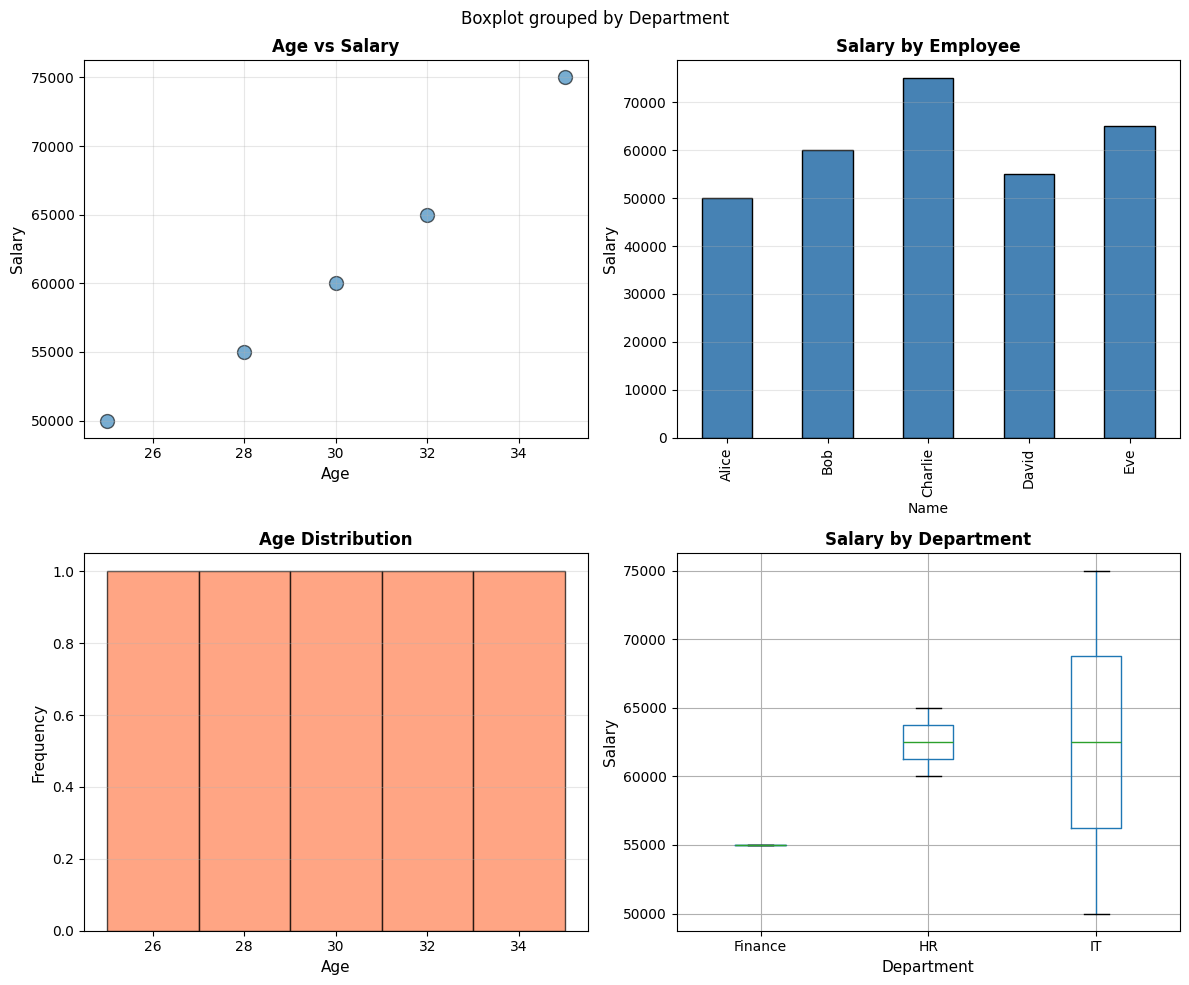

In [21]:
# SOLUTION: Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot
axes[0, 0].scatter(df['Age'], df['Salary'], s=100, alpha=0.6, edgecolors='black')
axes[0, 0].set_xlabel('Age', fontsize=11)
axes[0, 0].set_ylabel('Salary', fontsize=11)
axes[0, 0].set_title('Age vs Salary', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Bar plot
df.set_index('Name')['Salary'].plot(kind='bar', ax=axes[0, 1], color='steelblue', edgecolor='black')
axes[0, 1].set_title('Salary by Employee', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Salary', fontsize=11)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Histogram
axes[1, 0].hist(df['Age'], bins=5, edgecolor='black', alpha=0.7, color='coral')
axes[1, 0].set_xlabel('Age', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Box plot
df.boxplot(column='Salary', by='Department', ax=axes[1, 1])
axes[1, 1].set_title('Salary by Department', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Department', fontsize=11)
axes[1, 1].set_ylabel('Salary', fontsize=11)

plt.tight_layout()
plt.show()

## 6. Key Concepts Summary

### Data Wrangling:
- Filtering: Select rows based on conditions
- Sorting: Order data by column values
- Grouping: Aggregate data by categories
- Transformation: Create new columns and modify data

### Common Operations:
- `df[condition]`: Filter rows
- `df.sort_values()`: Sort data
- `df.groupby()`: Group and aggregate
- `df.drop_duplicates()`: Remove duplicates
- `df.dropna()`: Remove missing values
- `df.rename()`: Rename columns
- `df.astype()`: Convert data types

### Visualization:
- Scatter plots: Show relationships
- Bar plots: Compare categories
- Histograms: Show distributions
- Box plots: Show quartiles and outliers